<p style="text-align: center">
<h1>
Data Visualizations
</h1>
Discovering as much as I can regarding the data set
</p>

<br>
<img src="C1Banner.png"/>



In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [2]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 720x432 with 0 Axes>

In [3]:
df = pd.read_pickle('Data/pickles/clean_data')

# Numerical Data
## General Idea of Numeric Data Distribution

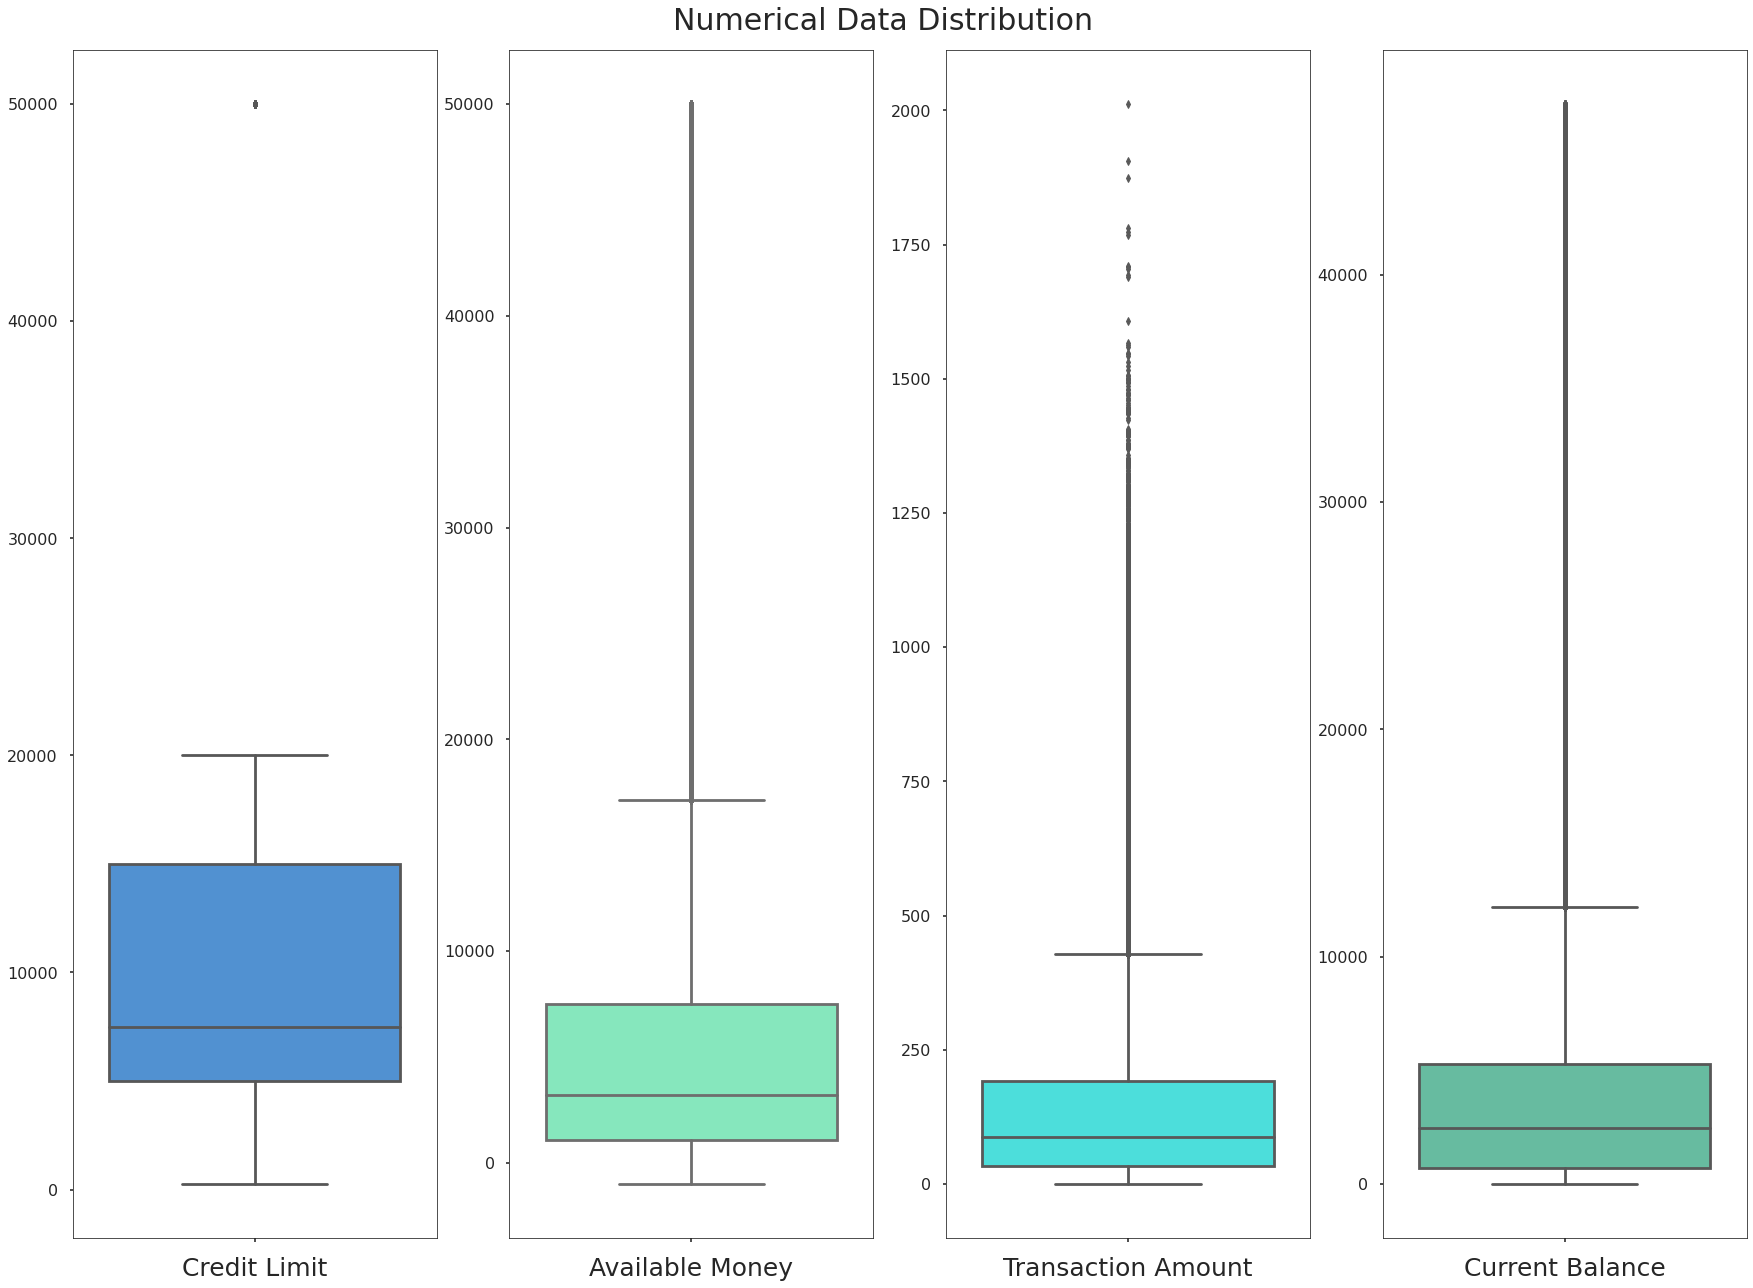

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,20))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']

for i in range(len(numeric_cols)):
    sns.boxplot(data=df, x=numeric_cols[i], ax=ax[i], color=colors[i], orient='v')
    ax[i].set_xlabel(neat_cols[i], fontsize=25)
    ax[i].set_ylabel('')
plt.suptitle('Numerical Data Distribution', fontsize=30)
fig.subplots_adjust(top=0.95)

### Credit Limit
* Some really far outliers at credit limit of 50,000 -- expected since a higher credit limit is not easily achieved

* Also does not seem to have a normal distribution

### Available Money
* Appears to be right skewed

* Interesting to see that available money is so low, I would've expected the general credit money to be higher

* More outliers as money increases, which makes sense

### Transaction Amount
* Right skewed

* Seems that the general transaction amount is typically low, which makes sense as usually people aren't spending hundreds of dollars casually

* Surprised to see that the maximum transaction amount in this data set is ~2000 -- I expected some larger numbers

### Current Balance
* Right skewed

* Really interesting again that the usual balance for a bank customer is so low.

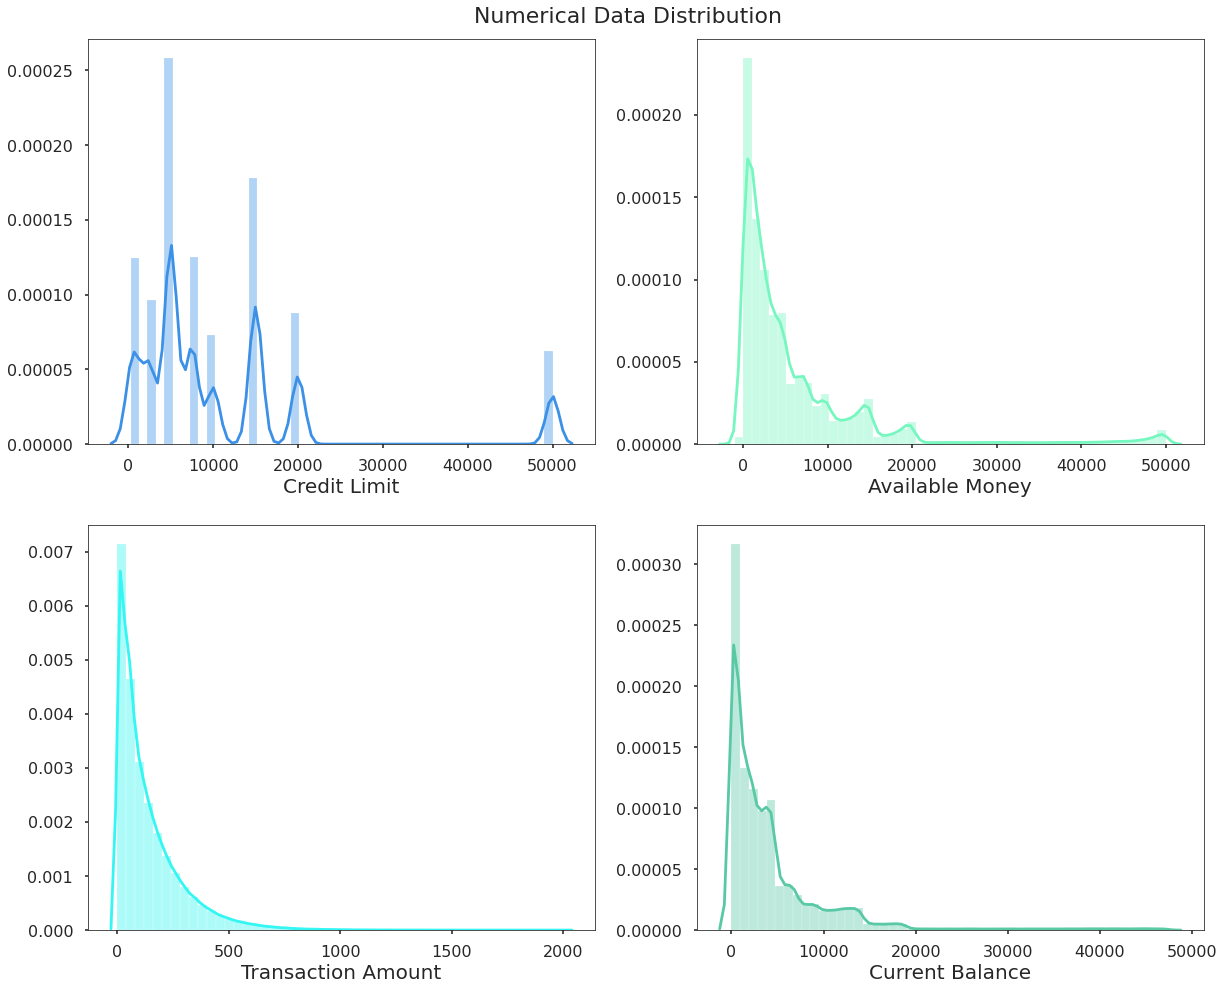

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']
counter = 0

for i in range(2):
    for j in range(2):
        sns.distplot(df[numeric_cols[counter]], ax=ax[i][j], color=colors[counter])
        ax[i][j].set_xlabel(neat_cols[counter], fontsize=20)
        ax[i][j].set_ylabel('')
        counter+=1

fig.suptitle('Numerical Data Distribution', fontsize=22)
fig.subplots_adjust(top=0.95)

### Credit Limit
* Data is messier than initially expected. The distribution is multimodal and a simple transformation will not work.

* Makes sense that the distribution is multimodal since it seems like these limit values are predetermined are not random

### Available Money
* Extremely right skewed
* This makes sense though since you won't find too many people with the same amount of available money as their credit limit since they have probably spent money already.

### Transaction Amount
* Right skewed
* Behavior of the distribution is really satisfying.

### Current Balance
* Right skewed
* Really interesting again that the usual balance for a bank customer is so low.

## Credit Limit and Transaction Amount

Text(0, 0.5, 'Transaction Amount')

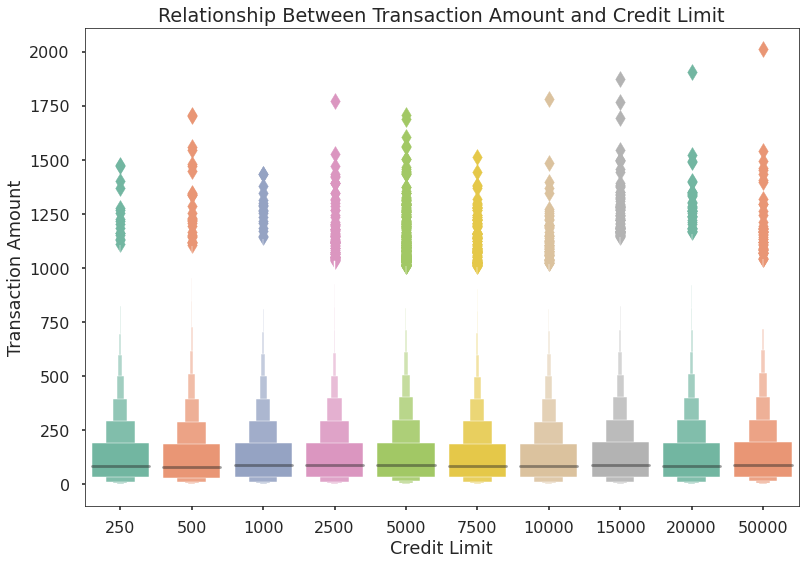

In [6]:
sns.boxenplot(data=df, x='creditLimit', y='transactionAmount', palette='Set2')
plt.title('Relationship Between Transaction Amount and Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Transaction Amount')

* I had an idea that having a higher credit limit would lead to more expensive and more overall transactions, but this does not seem to be the case.

* Perhaps the people with high credit limits are those who are wise with their money and do not spend it recklessly.

## Transaction Amount and Current Balance
* Assuming that people with smaller balances have less expensive and less transactions (I hope)

Text(0, 0.5, 'Transaction Amount')

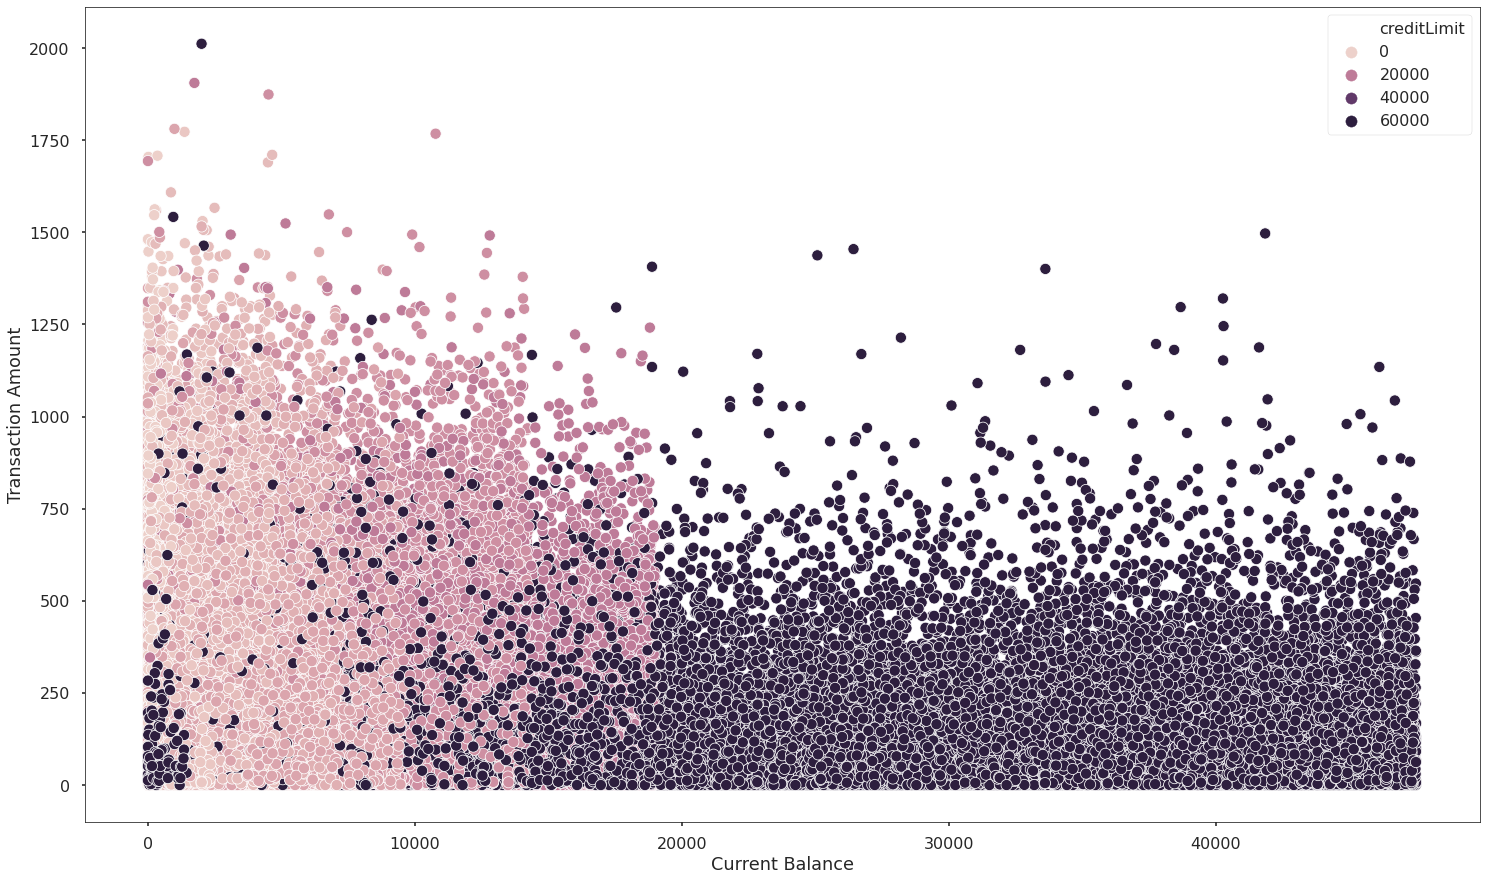

In [7]:
plt.figure(figsize=(25,15))
sns.scatterplot(data=df, x='currentBalance', y='transactionAmount', hue='creditLimit')
plt.xlabel('Current Balance')
plt.ylabel('Transaction Amount')

* People with larger balances tend to have higher credit limits
* Interesting that some people with really high credit limits have 0 in their current balance
    * I wonder if this is due to messy data or just a real fact


In [8]:
# Resetting fig to default size
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

# Categorical Data

## isFraud

* This is an interesting feature that is _conveniently_ formatted in a way that makes it a good target label.

Text(0, 0.5, 'Count')

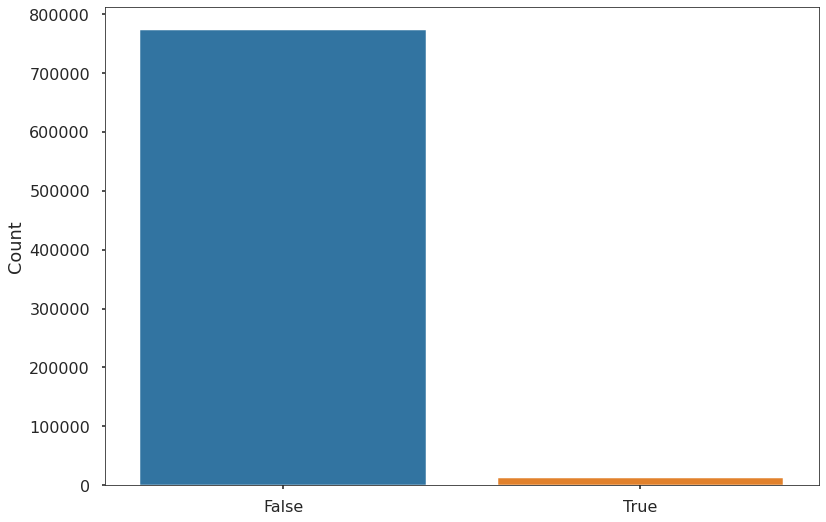

In [9]:
fraud_vals = df['isFraud'].value_counts()

sns.barplot(x=[0,1], y=fraud_vals)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.ylabel('Count')

* Unfortunately the classes are extremely unbalanced. A technique such as under-sampling would help even out the classes.

* Although it is fantastic that C1 has a minimal amount of fraudulent transactions

Text(0.5, 1.0, 'Comparing Transactions between Fraud and Authentic')

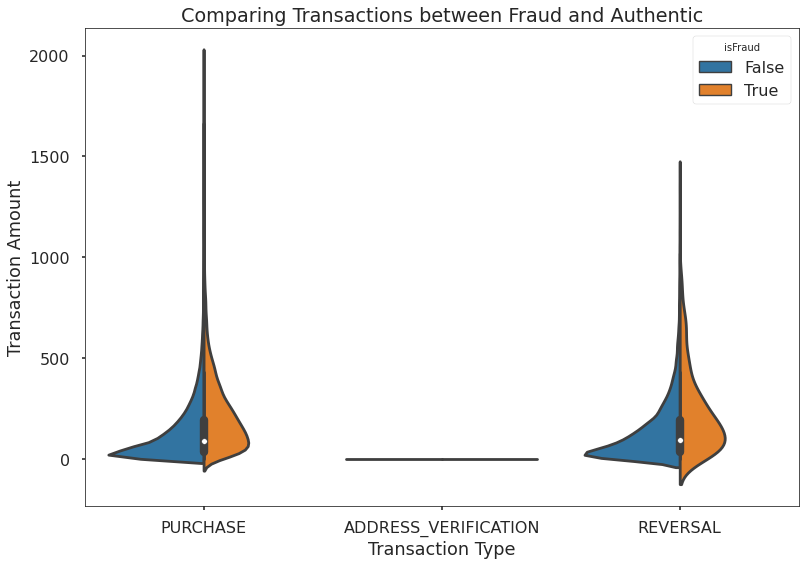

In [17]:
sns.violinplot(data=df, y='transactionAmount', x='transactionType', hue='isFraud', split=True)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Comparing Transactions between Fraud and Authentic')

* Interesting that fraudulent transactions are typically larger in the amount of money they contain. This does make sense though since the people committing fraudulent transactions are most likely not buying _Tic-Tacs_.

* I also find it interesting that fraudulent transactions are more common in Reversal Transactions. It seems as if it is possible that TRF is a more popular technique for committing fraud.


## Fraudulence in Card Present/Not Present Transactions
* Interested in looking at how fraudulent transactions differ in whether the the transaction is done online or in person

Text(0.5, 1.0, 'Relationship between Card Present Transactions and Fraudulent Transactions')

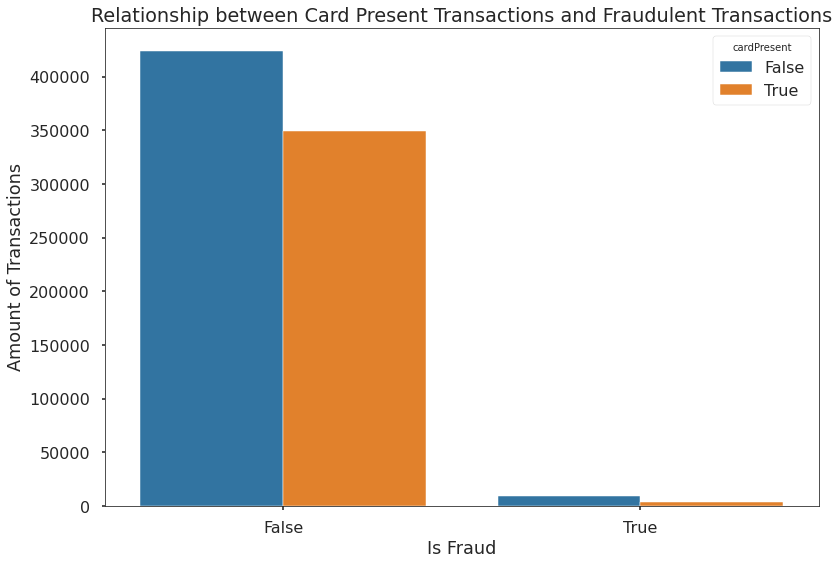

In [11]:
sns.countplot(data=df, x='isFraud', hue='cardPresent')
plt.xlabel('Is Fraud')
plt.ylabel('Amount of Transactions')
plt.title('Relationship between Card Present Transactions and Fraudulent Transactions')

* Cannot really say that more fraudulent transactions are made with CNP, as the same trend occurs for non-fraudulent transactions as well (more CNP transactions vs. CP)

## POS Condition Code
Slight intuition that this may relate to fraudulent transactions in some way... same idea with Pos Entry Mode as well

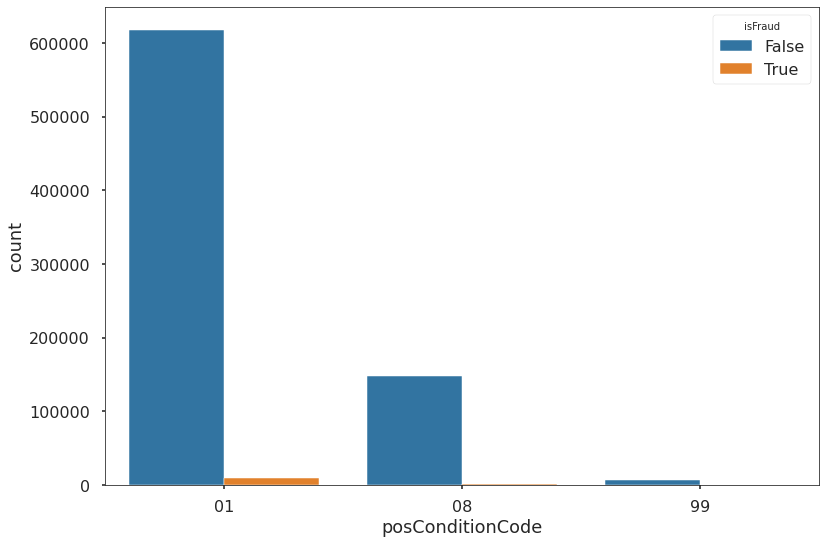

In [12]:
sns.countplot(data=df, x='posConditionCode', hue='isFraud')

* I don't seem to be able to find a pos condition code 99 online, so this is difficult to interpret
* My instinct says to keep this as an important feature, but I plan to experiment with with keeping/removing it in the predictive modeling section

# POS Entry Mode

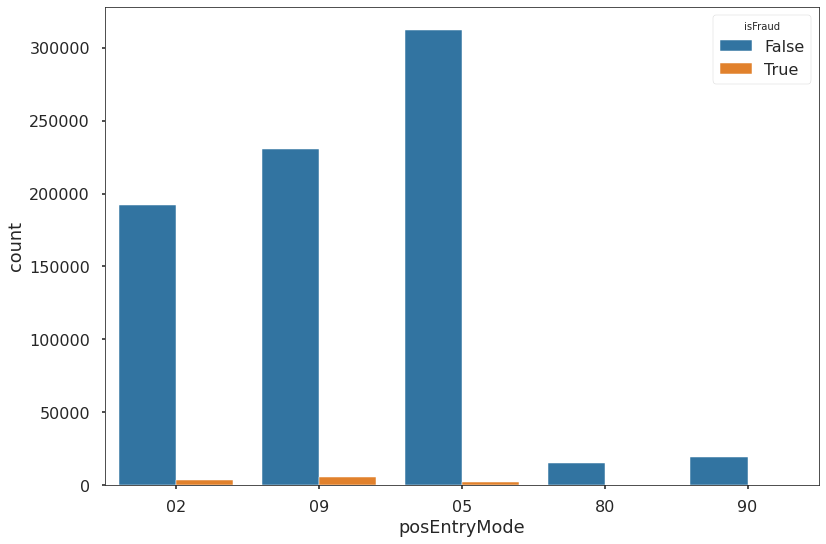

In [13]:
sns.countplot(data=df, x='posEntryMode', hue='isFraud')

* While the most fraudulent transactions occur within code 09, this doesn't necessarily mean anything as we discovered that this entire data set contains more CNP transactions vs. CP transactions.

* But I do think it is worth noting that PAN entry contains the most fraudulent transactions

## Mismatching CVVs
* Interested in comparing enteredCVV to cardCVV and see the relationship between mismatching CVVs and fraudulent transactions... more so to see if there are even mismatching CVVs that worked

Text(0.5, 0, 'Mismatching CVV')

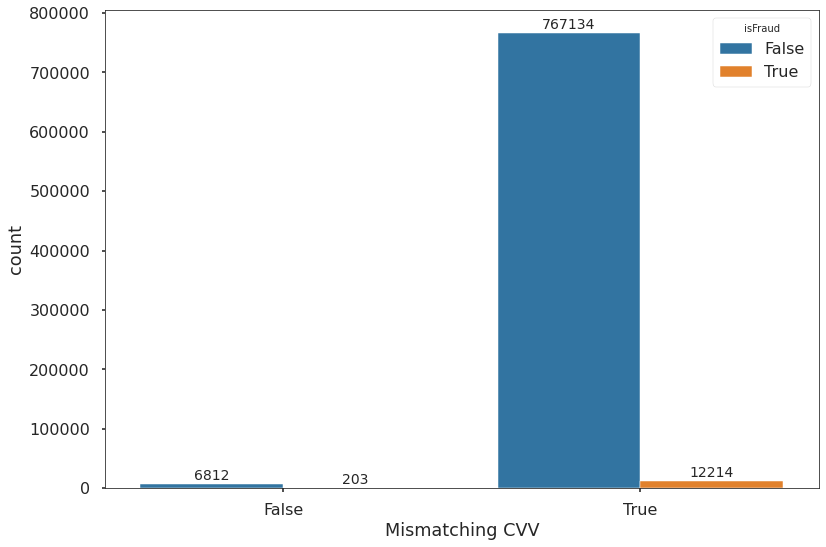

In [14]:
df['mismatchingCVV'] = df['cardCVV'] == df['enteredCVV']

ax = sns.countplot(data=df, x='mismatchingCVV', hue='isFraud')
for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 6700
            value = p.get_height()
            ax.text(_x, _y, value, ha="center", fontsize=14)
plt.xlabel('Mismatching CVV')

* Hard to tell, but technically there a fraudulent transaction is more likely to occur with a mismatching CVV
* Problem is there aren't many occurrences of mismatching CVVs, so it's hard to support that idea.
* This is an interesting feature that can be created for predictive modeling though

# Miscellaneous Discoveries

Text(0.5, 1.0, 'Top 20 Accounts with the Most Fraudulent Transactions')

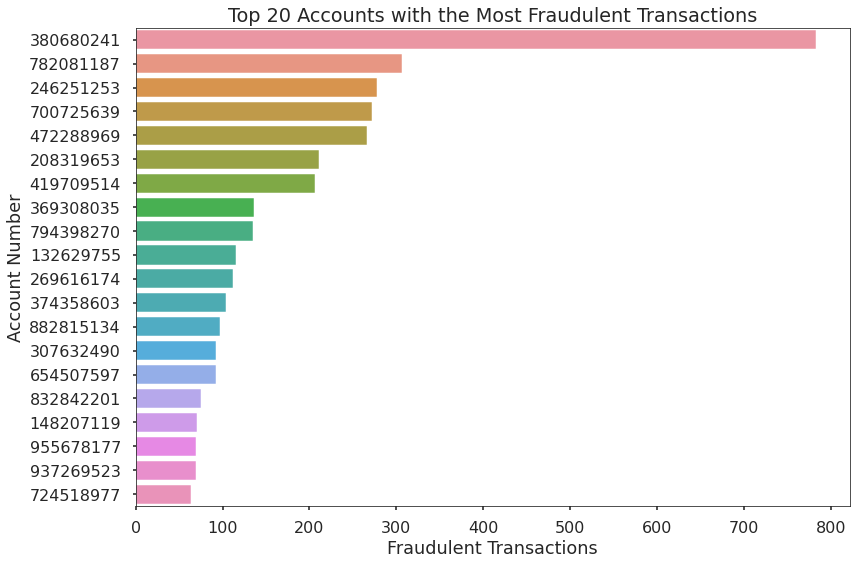

In [15]:
fraud_transactions_only = df[df['isFraud'] == True]

top20_fraudulent_accounts = fraud_transactions_only['accountNumber'].value_counts().head(20)
sns.barplot(y=list(range(20)), x=top20_fraudulent_accounts.values, orient='h')

plt.yticks(ticks=list(range(20)), labels=top20_fraudulent_accounts.index.tolist())
plt.ylabel('Account Number')
plt.xlabel('Fraudulent Transactions')
plt.title('Top 20 Accounts with the Most Fraudulent Transactions')

* I am intrigued by the account number "380680241" as it has a lot of fraudulent transactions

Text(0.5, 1.0, 'Most Popular Merchants of Account 380680241')

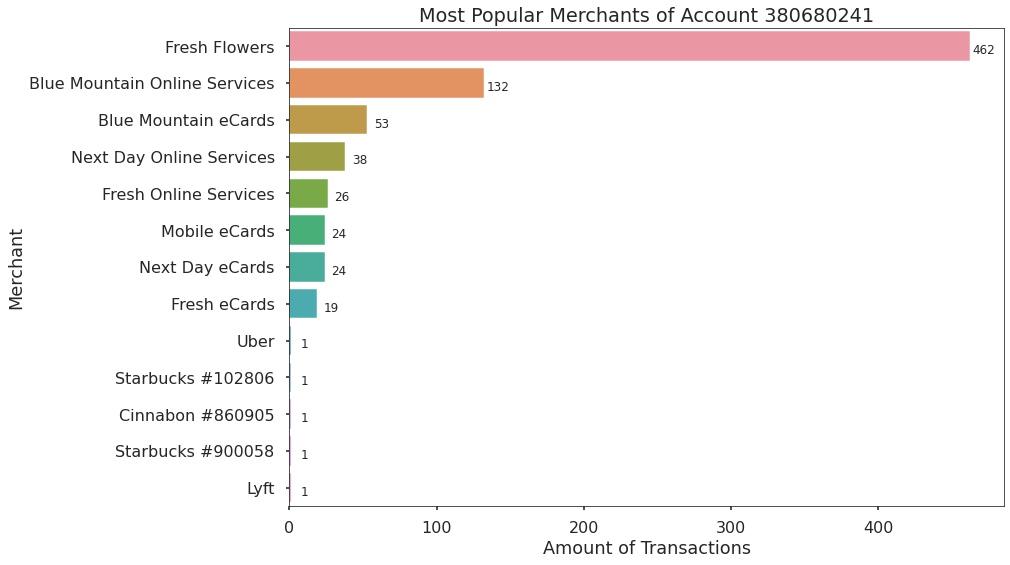

In [16]:
fraud_king = top20_fraudulent_accounts.index[0]
fraud_king_data = df[(df['accountNumber'] == fraud_king) & (df['isFraud'] == True)]
fraud_king_top_merchants = fraud_king_data['merchantName'].value_counts()

ax = sns.barplot(y=list(range(len(fraud_king_top_merchants))), x=fraud_king_top_merchants.values, orient='h')
for p in ax.patches:
    width = p.get_width()
    ax.text(width+9.5  ,
        p.get_y()+p.get_height()/2. + 0.2,
        int(width),
        ha="center", fontsize=12)

plt.yticks(ticks=list(range(len(fraud_king_top_merchants))), labels=fraud_king_top_merchants.index.tolist())
plt.xlabel('Amount of Transactions')
plt.ylabel('Merchant')
plt.title('Most Popular Merchants of Account 380680241')

* The flower transactions I am unsure of (making it up to his girlfriend??), but it's interesting to see what kind of fraudulent transactions people make.

* The eCards make sense since that's probably a way to obtain the money and use it